# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [45]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [46]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

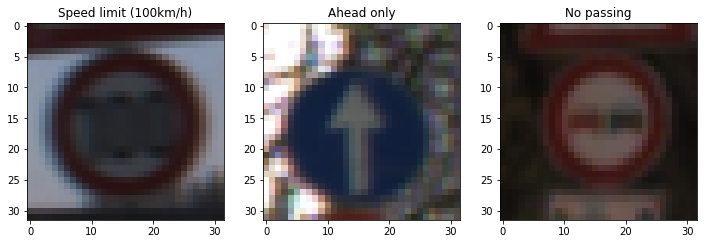

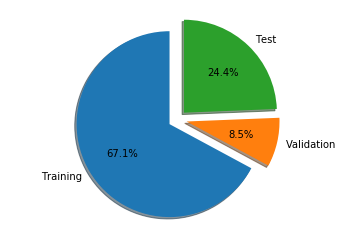

Speed limit (20km/h) : 180
Dangerous curve to the left : 180
Go straight or left : 180
Pedestrians : 210
End of all speed and passing limits : 210
End of no passing : 210
End of no passing by vehicles over 3.5 metric tons : 210
Road narrows on the right : 240
Bicycles crossing : 240
Double curve : 270
Keep left : 270
Dangerous curve to the right : 300
Roundabout mandatory : 300
Bumpy road : 330
Go straight or right : 330
End of speed limit (80km/h) : 360
Vehicles over 3.5 metric tons prohibited : 360
Turn left ahead : 360
Beware of ice/snow : 390
Slippery road : 450
Children crossing : 480
No vehicles : 540
Traffic signals : 540
Turn right ahead : 599
Stop : 690
Wild animals crossing : 690
No entry : 990
General caution : 1080
Ahead only : 1080
Right-of-way at the next intersection : 1170
Speed limit (60km/h) : 1260
Speed limit (120km/h) : 1260
Speed limit (100km/h) : 1290
No passing : 1320
Road work : 1350
Speed limit (80km/h) : 1650
Speed limit (70km/h) : 1770
No passing for vehicles

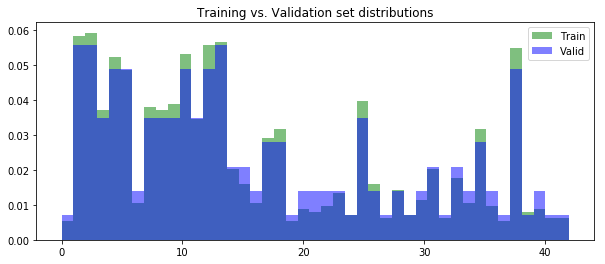

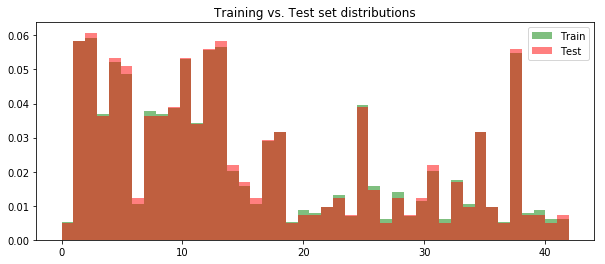

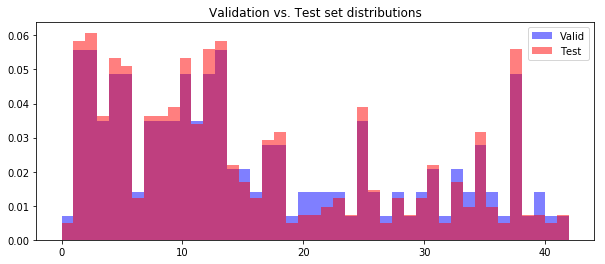

In [47]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
import operator
import csv

# Visualizations will be shown in the notebook.
%matplotlib inline

# Read sign names from file
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    sign_names = {rows[0]:rows[1] for rows in reader}

# Plot a few example images from the training set
plt.figure(figsize=(12,4))
for i in range(1,4):
    index = random.randint(0, len(X_train))
    plt.subplot(1,3,i)
    plt.imshow(X_train[index].squeeze())
    plt.title(sign_names[str(y_train[index])])
plt.savefig('plots/example images.png',bbox_inches='tight')

# Plot relative size of training, validation and test sets
labels = 'Training', 'Validation', 'Test'
sizes = [n_train, n_validation, n_test]
explode = (0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
fig1.savefig('plots/training vs validation vs test.png',bbox_inches='tight')
    
# Plot distributions of training, validation and test sets
plt.figure(figsize=(10,4))
plt.hist(y_train, n_classes, normed=1, facecolor='green', alpha=0.5, label='Train')
plt.hist(y_valid, n_classes, normed=1, facecolor='blue', alpha=0.5, label='Valid')
plt.legend(loc='upper right')
plt.title('Training vs. Validation set distributions')
plt.savefig('plots/training vs validation.jpg',bbox_inches='tight')

plt.figure(figsize=(10,4))
plt.hist(y_train, n_classes, normed=1, facecolor='green', alpha=0.5, label='Train')
plt.hist(y_test, n_classes, normed=1, facecolor='red', alpha=0.5, label='Test')
plt.legend(loc='upper right')
plt.title('Training vs. Test set distributions')
plt.savefig('plots/training vs test.jpg',bbox_inches='tight')

plt.figure(figsize=(10,4))
plt.hist(y_valid, n_classes, normed=1, facecolor='blue', alpha=0.5, label='Valid')
plt.hist(y_test, n_classes, normed=1, facecolor='red', alpha=0.5, label='Test')
plt.legend(loc='upper right')
plt.title('Validation vs. Test set distributions')
plt.savefig('plots/validation vs test.jpg',bbox_inches='tight')

sign_counts = {x:list(y_train).count(x) for x in set(y_train)}
sorted_sign_counts = sorted(sign_counts.items(), key=operator.itemgetter(1))
print(*[sign_names[str(x[0])] + ' : ' + str(x[1]) for x in sorted_sign_counts], sep='\n')


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [48]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import cv2
import numpy as np
from sklearn.preprocessing import scale

# Colour mapping
convert_to_grayscale = False
convert_to_luma = True

# Normalisation
normalise_pixels = True

def normalise(x):
    '''
    Normalise pixel values to zero mean and unit variance
    
    'x' - Input data set (a batch of images)
    
    Returns a normalised version of the images
    '''
    return [scale(img.astype(float)) for img in x]

def grayscale(x):
    '''
    Convert pixels in image to grayscale
    
    'x' - Input data set (a batch of images)
    
    Returns a grayscale version of the images
    '''
    return [cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in x]

def luma(x):
    '''
    Convert pixels to Y component of YUV colour mapping aka 'luma'
    
    'x' - Input data set (a batch of images)
    
    Returns the Y component of the images based on YUV colour mapping
    '''
    return [yuv[:,:,0] for yuv in [cv2.cvtColor(img, cv2.COLOR_RGB2YUV) for img in x]]

def resize_image(img, padding):
    '''
    Resize/scale an image by the specified number of pixels and then crop/pad to original canvas size
    
    'img' - Image to be transformed
    'padding' - Number of pixels to grow/shrink image by
    
    Returns an image with the same shape as the input image but with the content scaled
    '''
    
    height, width = img.shape[:2]
    scale = (height + 2 * padding) / height
    return cv2.warpAffine(img, np.float32([[scale, 0, -padding], [0, scale, -padding]]), (width,height), borderMode=cv2.BORDER_REPLICATE)

def rotate_image(img, angle_degrees):
    '''
    Rotates an image by the specified angle in degrees
    
    'img' - Image to be transformed
    'angle_degrees' - Angle to rotate the image by (in degrees)
    
    Returns an image with the same shape as the input image but with the content rotated
    '''
    height, width = img.shape[:2]
    M = cv2.getRotationMatrix2D((width / 2, height / 2), angle_degrees, 1)
    return cv2.warpAffine(img, M , (width, height), borderMode=cv2.BORDER_REPLICATE)

def translate_image(img, tx, ty):
    '''
    Translates an image by the specified number of pixels in x and y direction
    
    'img' - Image to be transformed
    'tx' - x-axis translation
    'ty' - y-axis translation
    
    Returns an image with the same shape as the input image but with the content translated
    '''
    height, width = img.shape[:2]
    M = np.float32([[1, 0, tx],[0, 1, ty]])
    return cv2.warpAffine(img, M , (width, height), borderMode=cv2.BORDER_REPLICATE)

def apply_jitter(x):
    '''
    Randomly rotates, translates and resizes a set of images
    
    'x' - Input data set (a batch of images)
    
    Returns a "randomly" transformed version of the input images.
    '''
    jittered = x
    jittered = [rotate_image(img, random.randint(-15,15)) for img in jittered]
    jittered = [translate_image(img, random.randint(-2,2), random.randint(-2,2)) for img in jittered]
    jittered = [resize_image(img, random.randint(-3,3)) for img in jittered]
    return jittered

def preprocess(x):
    '''
    Applies preprocessing to all images that are to be fed through the neural network
    
    'x' - Input data set (a batch of images)
    
    Returns the preprocessed set of images, ready to go through the neural network
    '''
    # Choose colour mapping to use
    if(convert_to_grayscale):
        x = grayscale(x)
    elif(convert_to_luma):
        x = luma(x)
        
    # Normalise pixel values
    if(normalise_pixels):
        x = normalise(x)
        
    # Reshape image channels
    x = np.expand_dims(x, axis=3)
    
    return x

# Store number of channels in our images (depends on preprocessing options)
n_channels = 1 if (convert_to_grayscale or convert_to_luma) else 3

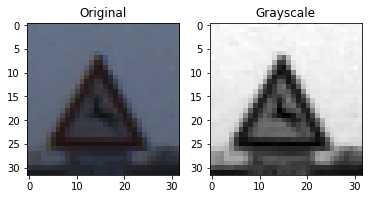

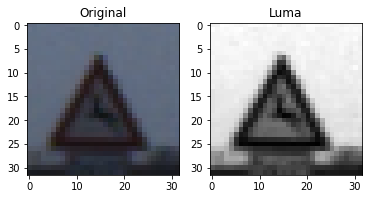

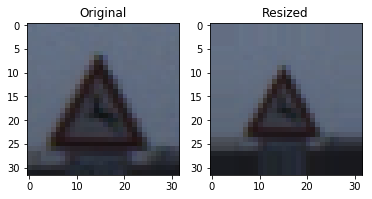

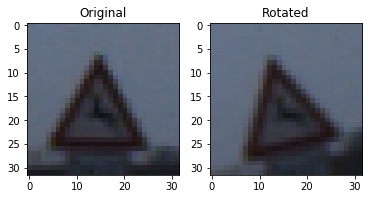

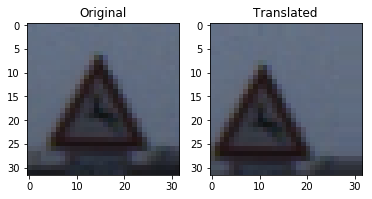

In [49]:
# Test preprocessing - try out some preprocessing options
img = X_train[600]
resized = resize_image(img, -4)
rotated = rotate_image(img, 15)
translated = translate_image(img, -4, 2)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

lumaa = yuv[:,:,0]

plt.figure(figsize=(6,12))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale')
plt.savefig('plots/grayscale.png',bbox_inches='tight')

plt.figure(figsize=(6,12))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(lumaa, cmap='gray')
plt.title('Luma')
plt.savefig('plots/luma.png',bbox_inches='tight')

plt.figure(figsize=(6,12))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(resized)
plt.title('Resized')
plt.savefig('plots/resized.png',bbox_inches='tight')

plt.figure(figsize=(6,12))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(rotated)
plt.title('Rotated')
plt.savefig('plots/rotated.png',bbox_inches='tight')

plt.figure(figsize=(6,12))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(translated)
plt.title('Translated')
plt.savefig('plots/translated.png',bbox_inches='tight')

In [50]:
# Append jittered version of training data and append it to training set
print('Appending jittered training data...')

X_train_orig = X_train
y_train_orig = y_train
for i in range(0, 5):
    X_train = np.append(X_train, apply_jitter(X_train_orig), axis=0)
    y_train = np.append(y_train, y_train_orig)

# Make sure that new training sets are the expected size
print('Original X_train =', X_train_orig.shape)
print('Original + Jittered X_train =', X_train.shape)

print('Original y_train =', y_train_orig.shape)
print('Original + Jittered y_train =', y_train.shape)

# Apply preprocessing to all input data
print('Preprocessing data...')
X_train = preprocess(X_train)
X_valid = preprocess(X_valid)
X_test = preprocess(X_test)
print('Done')

Appending jittered training data...
Original X_train = (34799, 32, 32, 3)
Original + Jittered X_train = (208794, 32, 32, 3)
Original y_train = (34799,)
Original + Jittered y_train = (208794,)
Preprocessing data...


### Model Architecture

In [51]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [52]:
# Hyper parameters
import tensorflow as tf

# Training iterations and batch size
EPOCHS = 6               # Default = 10
BATCH_SIZE = 64          # Default = 128

# Learing rate
LEARING_RATE = 0.0015     # Default = 0.001

# Weight initialisation mean and standard deviation
MU = 0                   # Default = 0
SIGMA = 0.1              # Default = 0.1

# Dropout parameters
DROPOUT_KEEP_PROB = 0.75 # Default = 0.75

In [53]:
# Neural network structure
from tensorflow.contrib.layers import flatten

# Input/Output placeholders
x = tf.placeholder(tf.float32, (None, 32, 32, n_channels))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
    
one_hot_y = tf.one_hot(y, n_classes)

# Layer 1: Convolutional. Input = 32 x 32 x n_channels. Output = 28x28x6.
weights1 = tf.Variable (tf.truncated_normal(shape=(5,5,n_channels,6), mean=MU, stddev=SIGMA))
biases1 = tf.Variable (tf.zeros(6))
conv1 = tf.nn.conv2d(x, weights1, strides=[1,1,1,1], padding='VALID') + biases1

# Activation.
activation1 = tf.nn.relu(conv1)

# Pooling. Input = 28x28x6. Output = 14x14x6.
pool1 = tf.nn.max_pool(activation1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

# Layer 2: Convolutional. Output = 10x10x16.
weights2 = tf.Variable (tf.truncated_normal(shape=(5,5,6,16), mean=MU, stddev=SIGMA))
biases2 = tf.Variable (tf.zeros(16))
conv2 = tf.nn.conv2d(pool1, weights2, strides=[1,1,1,1], padding='VALID') + biases2

# Activation.
activation2 = tf.nn.relu(conv2)

# Pooling. Input = 10x10x16. Output = 5x5x16.
pool2 = tf.nn.max_pool(activation2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

# Flatten. Input = 5x5x16. Output = 400.
full2 = flatten(pool2)

# Layer 3: Fully Connected. Input = 400. Output = 120.
weights3 = tf.Variable (tf.truncated_normal(shape=(400, 120), mean=MU, stddev=SIGMA))
biases3 = tf.Variable (tf.zeros(120))
full3 = tf.matmul(full2, weights3) + biases3

# Dropout
dropout3 = tf.nn.dropout(full3, keep_prob)

# Activation.
activation3 = tf.nn.relu(dropout3)

# Layer 4: Fully Connected. Input = 120. Output = 84.
weights4 = tf.Variable (tf.truncated_normal(shape=(120, 84), mean=MU, stddev=SIGMA))
biases4 = tf.Variable (tf.zeros(84))
full4 = tf.matmul(activation3, weights4) + biases4

# Dropout
dropout4 = tf.nn.dropout(full4, keep_prob)

# Activation.
activation4 = tf.nn.relu(dropout4)

# Layer 5: Fully Connected. Input = 84. Output = n_classes.
weights5 = tf.Variable (tf.truncated_normal(shape=(84, n_classes), mean=MU, stddev=SIGMA))
biases5 = tf.Variable (tf.zeros(n_classes))
logits = tf.matmul(activation4, weights5) + biases5

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [54]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

Set up cost function and optimiser

In [55]:
# Cost function and optimisation
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARING_RATE)
training_operation = optimizer.minimize(loss_operation)

Evaluate how well the model fits the validation data

In [56]:
# Define function to evalutate the accuracy of our model against training/validation/test sets
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Train the model using the training data set and evaluate performance against training and validation sets

In [57]:
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: DROPOUT_KEEP_PROB})
            
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.917
Validation Accuracy = 0.939

EPOCH 2 ...
Training Accuracy = 0.953
Validation Accuracy = 0.950

EPOCH 3 ...
Training Accuracy = 0.963
Validation Accuracy = 0.956



KeyboardInterrupt: 

Test the model against the test data set

In [14]:
# Run against saved model
with tf.Session() as sess:
    saver.restore(sess, './lenet')

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.942


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [15]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

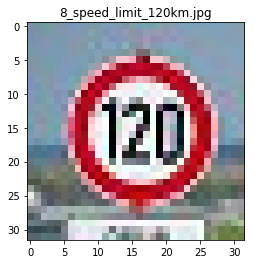

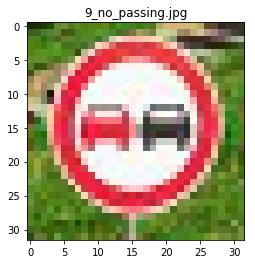

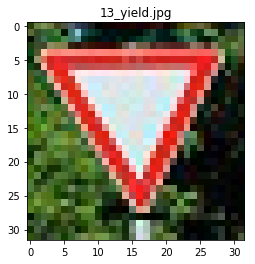

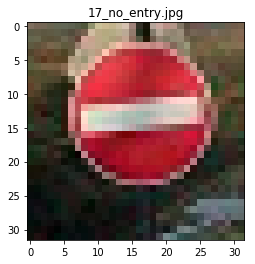

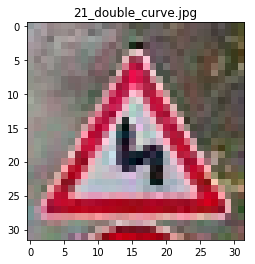

In [16]:
import matplotlib.image as mpimg

# Read in 5 images
image1 = mpimg.imread('internet-traffic-signs/8_speed_limit_120km.jpg')
image2 = mpimg.imread('internet-traffic-signs/9_no_passing.jpg')
image3 = mpimg.imread('internet-traffic-signs/13_yield.jpg')
image4 = mpimg.imread('internet-traffic-signs/17_no_entry.jpg')
image5 = mpimg.imread('internet-traffic-signs/21_double_curve.jpg')

# Define labels for images
label1 = 8
label2 = 9
label3 = 13
label4 = 17
label5 = 21

# Plot images
plt.figure(figsize=(4,4))
plt.imshow(image1)
plt.title('8_speed_limit_120km.jpg')

plt.figure(figsize=(4,4))
plt.imshow(image2)
plt.title('9_no_passing.jpg')

plt.figure(figsize=(4,4))
plt.imshow(image3)
plt.title('13_yield.jpg')

plt.figure(figsize=(4,4))
plt.imshow(image4)
plt.title('17_no_entry.jpg')

plt.figure(figsize=(4,4))
plt.imshow(image5)
plt.title('21_double_curve.jpg')


### Predict the Sign Type for Each Image

In [17]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [18]:
# Create features and labels
X_internet = [image1, image2, image3, image4, image5]
y_internet = [label1, label2, label3, label4, label5]

# Preprocess images
X_internet = preprocess(X_internet)

# Run against model
with tf.Session() as sess:
    saver.restore(sess, './lenet')

    internet_accuracy = evaluate(X_internet, y_internet)
    print("Internet Accuracy = {:.3f}".format(internet_accuracy))

C:\Users\andyk\Miniconda3\envs\carnd-term1\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


Internet Accuracy = 1.000


### Analyze Performance

In [19]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

# See above

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [20]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [21]:
# Run against model
with tf.Session() as sess:
    saver.restore(sess, './lenet')

    # Output top 5 possibilies for each input image with their probabilities
    probabilities = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={x:X_internet, y:y_internet, keep_prob:1})
    print(probabilities)

TopKV2(values=array([[  9.90805387e-01,   7.34623382e-03,   1.84398412e-03,
          2.78782272e-06,   6.73054842e-07],
       [  1.00000000e+00,   1.07225694e-10,   1.40390061e-11,
          8.73560859e-12,   5.59602947e-15],
       [  1.00000000e+00,   7.26922913e-15,   5.41619667e-19,
          4.21832903e-20,   1.17334601e-21],
       [  9.99633551e-01,   3.00371612e-04,   6.56899865e-05,
          2.22806605e-07,   6.06628987e-08],
       [  9.98688400e-01,   1.29664363e-03,   8.52348785e-06,
          3.49931383e-06,   2.90619187e-06]], dtype=float32), indices=array([[ 8,  4,  7, 14,  5],
       [ 9, 15,  3, 10, 32],
       [13, 15, 12,  3, 35],
       [17, 14, 13, 33,  9],
       [21, 11, 25, 30, 23]]))


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [22]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

(1, 32, 32, 1)


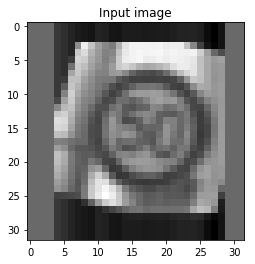

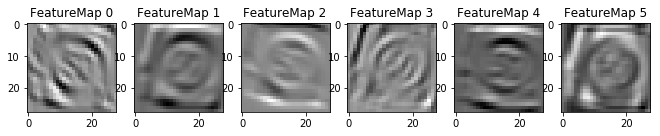

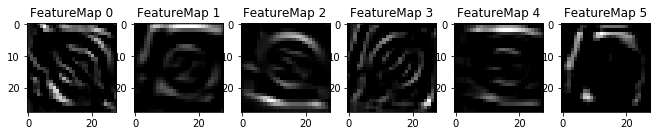

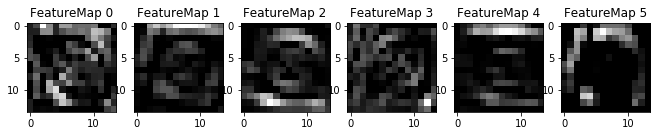

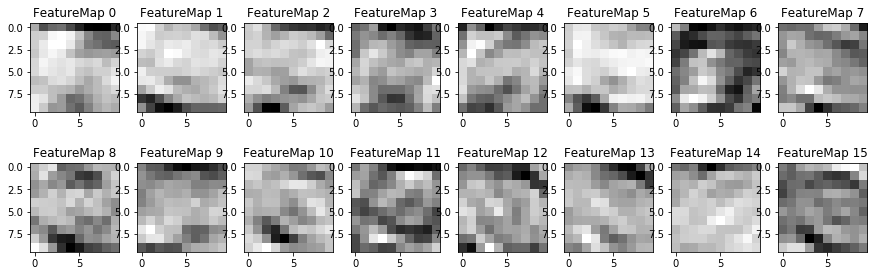

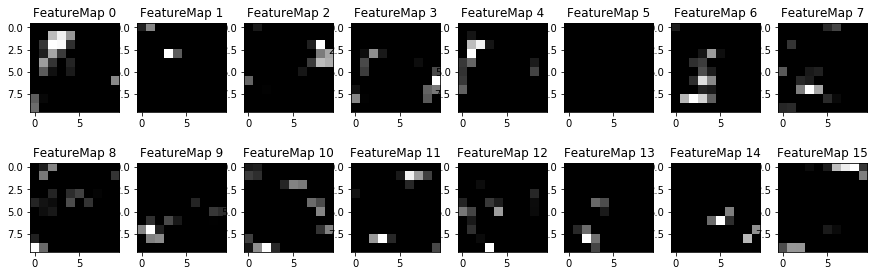

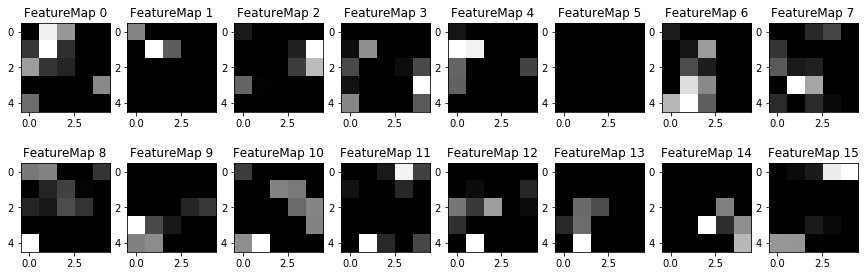

In [23]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    
    img = X_train[600:601]
    
    print(img.shape)
    
    plt.figure(1, figsize=(4,4))
    plt.imshow(img[0,:,:,0], cmap='gray')
    plt.title('Input image')
    
    outputFeatureMap(img, conv1, plt_num=2)
    outputFeatureMap(img, activation1, plt_num=3)
    outputFeatureMap(img, pool1, plt_num=4)
    
    outputFeatureMap(img, conv2, plt_num=5)
    outputFeatureMap(img, activation2, plt_num=6)
    outputFeatureMap(img, pool2, plt_num=7)